In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns=df.columns.str.lower().str.replace('-','_').str.strip()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df[df.duplicated()==True].sum()

age                                                             799
workclass          Private Private Private Private Private Priva...
fnlwgt                                                      4473924
education          Bachelors Some-college Some-college Some-coll...
education_num                                                   205
marital_status     Never-married Never-married Never-married Nev...
occupation         Craft-repair Other-service Prof-specialty Tec...
relationship       Not-in-family Not-in-family Own-child Not-in-...
race               White Asian-Pac-Islander White White White Wh...
sex                Male Male Female Female Female Male Male Male...
capital_gain                                                      0
capital_loss                                                      0
hours_per_week                                                  877
native_country     Mexico United-States United-States United-Sta...
income             <=50K <=50K <=50K <=50K <=50K

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
categorical_cols=[col for col in df.columns if df[col].dtype=='object']
numerical_cols=[col for col in df.columns if df[col].dtype!='object']

In [9]:
for col in categorical_cols:
    unique_values=df[col].unique()
    print(f'{col}: {unique_values}')
    print("\n",'='*100,end='\n\n')

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


marital_status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


sex: [' Male' ' Female']


native_country: [' United-States' ' Cuba'

In [10]:
for cols in categorical_cols:
    df[cols]=df[cols].str.replace(' ','')

In [11]:
wrong_values=[]
for col in categorical_cols:
    if col in df.columns:
        if df[col].astype(str).isin([' ?']).any():
            print(f"{col}: '?' found")
            wrong_values.append(col)
            print("-" * 40)


In [12]:
for col in wrong_values:
    df[col] = df[col].replace(' ?', np.nan)

In [13]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
sns.pairplot(df,hue='income')
plt.show()

KeyboardInterrupt: 

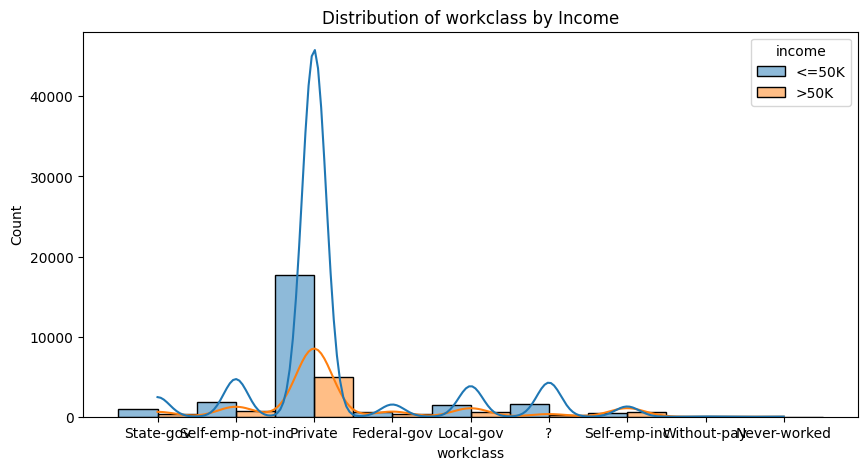

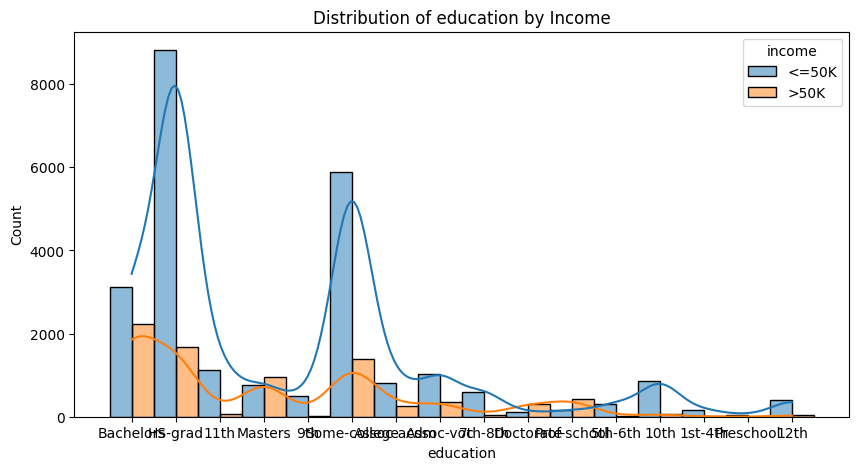

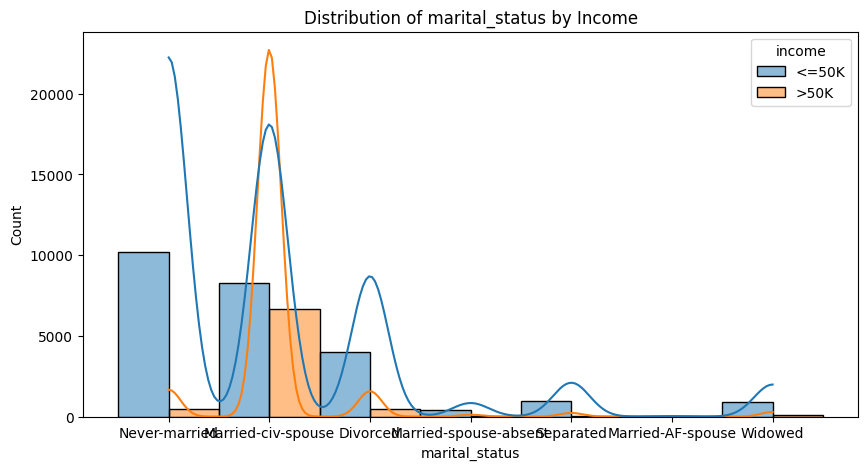

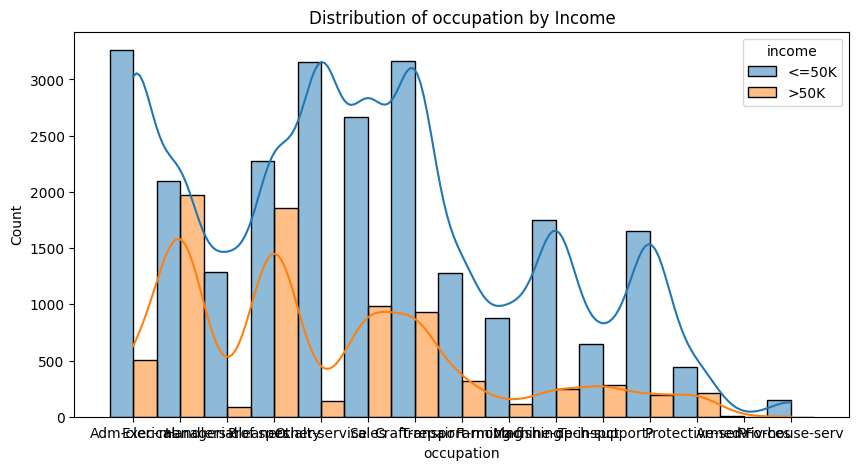

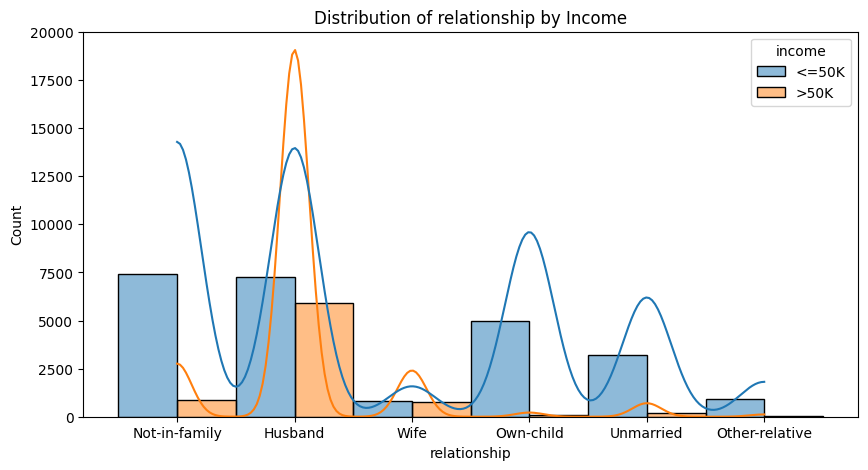

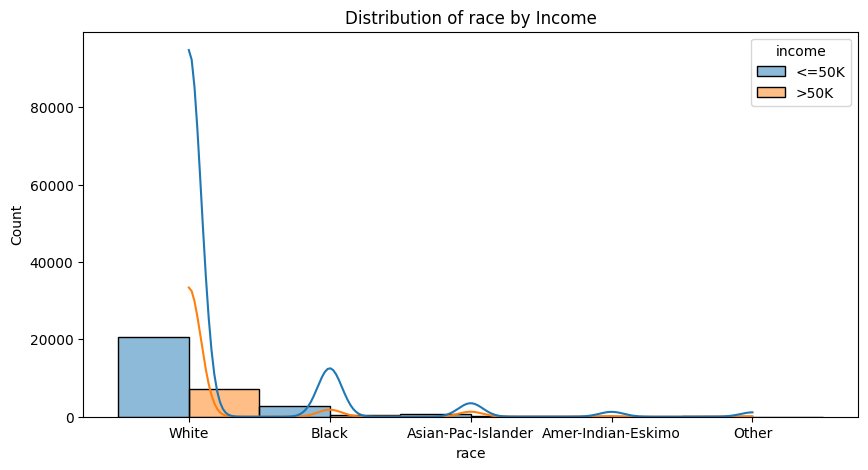

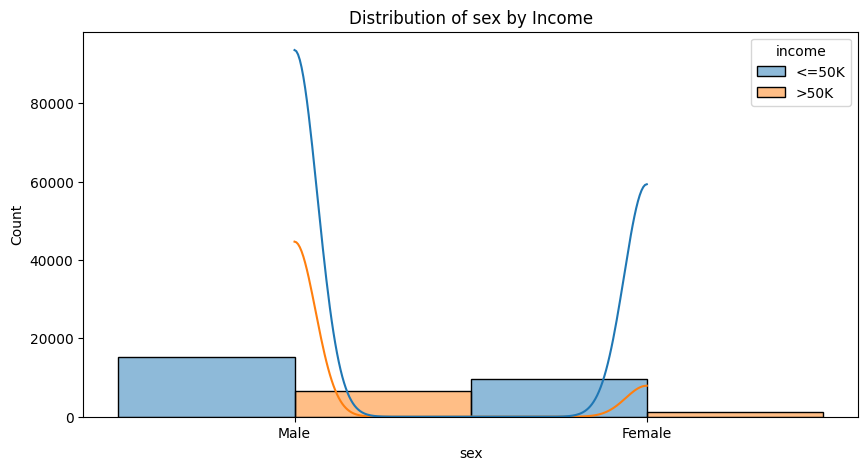

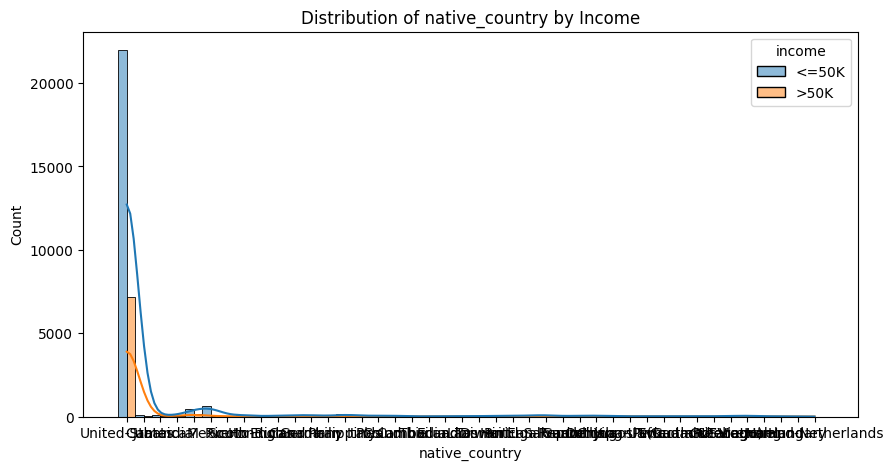

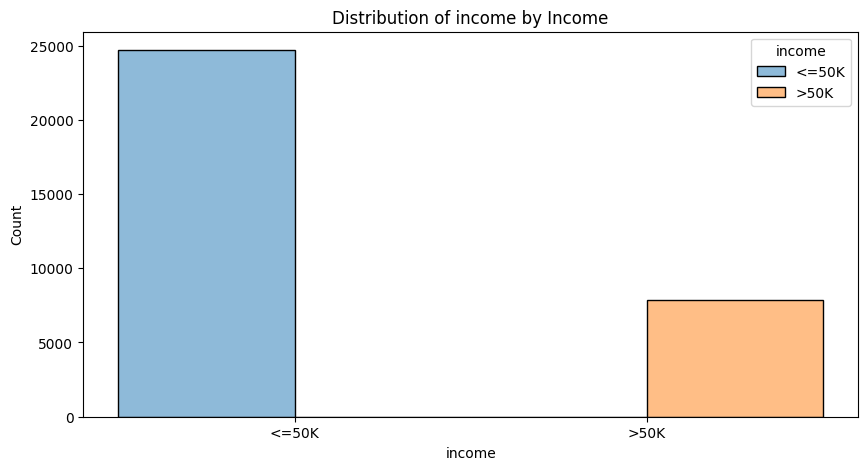

In [ ]:
for cols in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=cols, hue='income', multiple='dodge',kde=True,discrete=True)
    plt.title(f'Distribution of {cols} by Income')
    plt.show()

In [ ]:
for col in df.columns:
    ratio=(df[col].nunique()/len(df))
    print(f'{col}: {ratio:.2%}')

age: 0.22%
workclass: 0.03%
fnlwgt: 66.53%
education: 0.05%
education_num: 0.05%
marital_status: 0.02%
occupation: 0.05%
relationship: 0.02%
race: 0.02%
sex: 0.01%
capital_gain: 0.37%
capital_loss: 0.28%
hours_per_week: 0.29%
native_country: 0.13%
income: 0.01%


In [ ]:
ratios_income_by_sex=df.groupby('income')['sex'].value_counts().unstack()
female_income_ratio = ratios_income_by_sex.loc['>50K', 'Female'] / ratios_income_by_sex.loc['>50K'].sum()
male_income_ratio = ratios_income_by_sex.loc['>50K','Male']/ ratios_income_by_sex.loc['>50K'].sum()
print(f"Male Ratio in Income >50K: {male_income_ratio:.2%}")
print(f"Female Ratio in Income >50K: {female_income_ratio:.2%}")

Male Ratio in Income >50K: 84.96%
Female Ratio in Income >50K: 15.04%


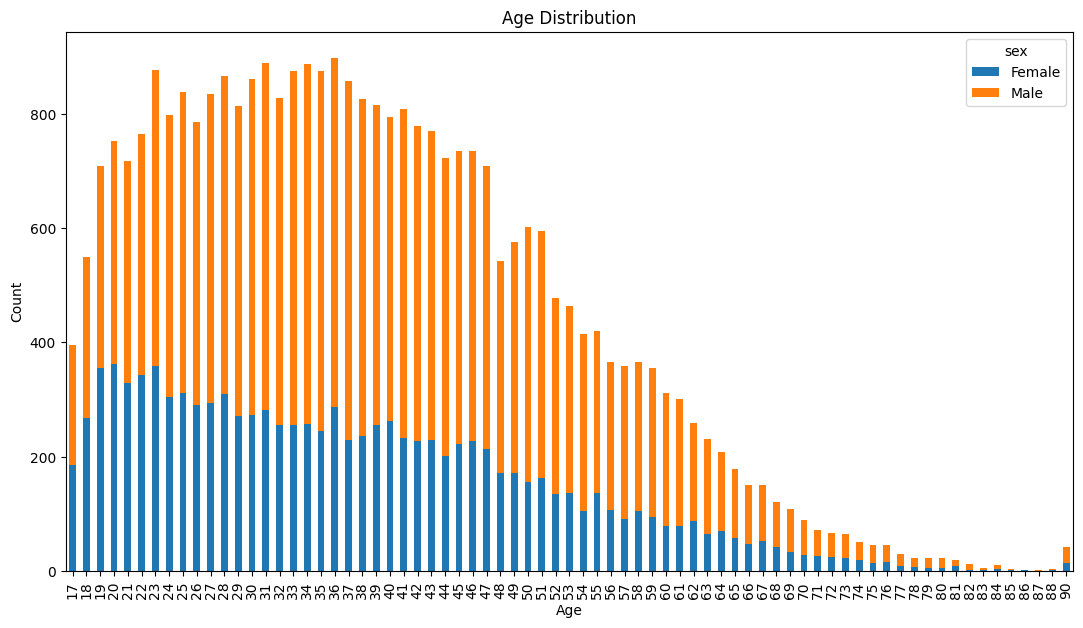

In [ ]:
age_in_sex=df.groupby('age')['sex'].value_counts().unstack()
age_in_sex.plot(kind='bar', stacked=True, figsize=(13,7))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
X=df.drop('income',axis=1)
y=df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorics=[col for col in X.columns if X[col].dtype=='object']
numericals=[col for col in X.columns if X[col].dtype!='object']

for col in categorics:
    print(f'{col}: {X[col].nunique()}')

workclass: 9
education: 16
marital_status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native_country: 42


In [ ]:
y_train_binary=y_train.map({'>50K':1,'<=50K':0})
y_test_binary=y_test.map({'>50K':1,'<=50K':0})

In [ ]:
target_mean=y_train_binary.groupby(X_train['native_country']).mean()

In [ ]:
X_train['native_country']=X_train['native_country'].map(target_mean)
X_train['native_country']=X_train['native_country'].fillna(X_train['native_country'].mode()[0])
X_test['native_country']=X_test['native_country'].map(target_mean)
X_test['native_country']=X_test['native_country'].fillna(X_train['native_country'].mode()[0])

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ('num', RobustScaler(), numericals),
    ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorics[0:-1])
],remainder='passthrough')
X_train_enc=preprocessor.fit_transform(X_train)
X_test_enc=preprocessor.transform(X_test)

In [ ]:
feature_names=preprocessor.get_feature_names_out()
pd.DataFrame(X_train_enc,columns=feature_names).head()

,num__age,num__fnlwgt,num__education_num,num__capital_gain,num__capital_loss,num__hours_per_week,cat__workclass_?,cat__workclass_Federal-gov,cat__workclass_Local-gov,cat__workclass_Never-worked,...,cat__relationship_Unmarried,cat__relationship_Wife,cat__race_Amer-Indian-Eskimo,cat__race_Asian-Pac-Islander,cat__race_Black,cat__race_Other,cat__race_White,cat__sex_Female,cat__sex_Male,remainder__native_country
0,-0.05,-0.426103,-0.333333,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.24477
1,0.75,-0.537508,-0.333333,3325.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.24477
2,-0.15,0.260402,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.24477
3,0.85,0.038677,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.24477
4,-0.35,-0.796090,-0.333333,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.24477


In [ ]:
pd.DataFrame(X_test_enc,columns=feature_names).head()

,num__age,num__fnlwgt,num__education_num,num__capital_gain,num__capital_loss,num__hours_per_week,cat__workclass_?,cat__workclass_Federal-gov,cat__workclass_Local-gov,cat__workclass_Never-worked,...,cat__relationship_Unmarried,cat__relationship_Wife,cat__race_Amer-Indian-Eskimo,cat__race_Asian-Pac-Islander,cat__race_Black,cat__race_Other,cat__race_White,cat__sex_Female,cat__sex_Male,remainder__native_country
0,-0.30,-1.213035,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.24477
1,-0.65,-0.401384,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.24477
2,1.15,-0.670059,0.000000,0.0,0.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.29697
3,-0.30,1.839692,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.24477
4,0.30,-0.282474,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.24477


In [ ]:
def myPipeline(model):
    pipe=Pipeline(steps=[
  
        ('classifier', model)
    ])
    pipe.fit(X_train_enc,y_train_binary)
    y_pred=pipe.predict(X_test_enc)
    print("Confusion Matrix:\n",confusion_matrix(y_test_binary,y_pred))
    print("\nClassification Report:\n",classification_report(y_test_binary,y_pred))
    print("Accuracy:", accuracy_score(y_test_binary,y_pred))
    

In [ ]:
rfc=RandomForestClassifier()
myPipeline(rfc)

Confusion Matrix:
 [[4559  346]
 [ 570 1033]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4905
           1       0.75      0.64      0.69      1603

    accuracy                           0.86      6508
   macro avg       0.82      0.79      0.80      6508
weighted avg       0.85      0.86      0.86      6508

Accuracy: 0.8592501536570375


In [ ]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params={
    'criterion': ['gini', 'entropy','log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
random=RandomizedSearchCV(estimator=rfc, param_distributions=params, cv=5, n_jobs=-1, verbose=1)
myPipeline(random)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Confusion Matrix:
 [[4608  297]
 [ 575 1028]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4905
           1       0.78      0.64      0.70      1603

    accuracy                           0.87      6508
   macro avg       0.83      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508

Accuracy: 0.8660110633066994


In [ ]:
random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'criterion': 'log_loss'}

In [ ]:
features_importance=pd.DataFrame(rfc.feature_importances_, index=feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)

In [ ]:
to_drop=features_importance.tail(10)

In [ ]:
X_train_enc=pd.DataFrame(X_train_enc,columns=feature_names).drop(to_drop.index,axis=1)
X_test_enc=pd.DataFrame(X_test_enc,columns=feature_names).drop(to_drop.index,axis=1)

In [ ]:
rfc=RandomForestClassifier()
myPipeline(rfc)

Confusion Matrix:
 [[4562  343]
 [ 584 1019]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4905
           1       0.75      0.64      0.69      1603

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.85      0.86      0.85      6508

Accuracy: 0.857559926244622


In [ ]:
random=RandomizedSearchCV(estimator=rfc, param_distributions=params, cv=5, n_jobs=-1, verbose=1)
myPipeline(random)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Confusion Matrix:
 [[4612  293]
 [ 588 1015]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4905
           1       0.78      0.63      0.70      1603

    accuracy                           0.86      6508
   macro avg       0.83      0.79      0.81      6508
weighted avg       0.86      0.86      0.86      6508

Accuracy: 0.8646281499692686


In [ ]:
random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'criterion': 'log_loss'}